In [1]:

from dataprocess import *
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:

data = main()
df = process_data(data)
df.head()


,subject_id,HP:0000093,HP:0000829,HP:0000843,HP:0000870,HP:0001873,HP:0001880,HP:0001882,HP:0001888,HP:0001894,...,HP:0040303,HP:0045042,HP:0045057,HP:0100493,HP:0100827,HP:0410173,HP:0410174,HP:0410288,HP:0410289,disease
0,10006,0,0,0,0,1,0,1,1,1,...,1,0,0,0,1,0,1,0,0,1
1,10011,0,0,0,0,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,1
2,10013,0,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,10017,0,0,0,0,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
4,10019,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


<Axes: >

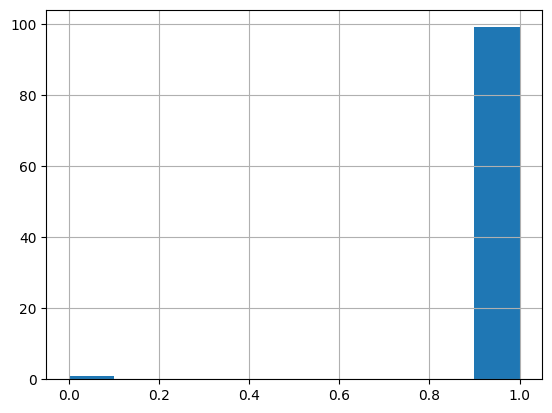

In [10]:

X = df.drop(['subject_id', 'disease'], axis=1)
y = df['disease']
df['disease'].hist()


100

In [5]:
classifier = RandomForestClassifier(n_estimators=3, random_state=42)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [6]:

# Predict the test set
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Accuracy: 1.0


80